In [ ]:
!gdown 1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT

Downloading...
From (original): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
From (redirected): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT&confirm=t&uuid=802c8c19-beaf-4624-b03b-3a1be7a18299
To: /content/ninjacart_data.zip
100% 275M/275M [00:04<00:00, 68.0MB/s]


In [ ]:
!unzip /content/ninjacart_data.zip

Archive:  /content/ninjacart_data.zip
   creating: ninjacart_data/test/
   creating: ninjacart_data/test/indian market/
  inflating: ninjacart_data/test/indian market/bhl.jpeg  
  inflating: ninjacart_data/test/indian market/bhv.jpeg  
  inflating: ninjacart_data/test/indian market/bn.jpeg  
  inflating: ninjacart_data/test/indian market/hjx.jpeg  
  inflating: ninjacart_data/test/indian market/igis.jpeg  
  inflating: ninjacart_data/test/indian market/in.jpeg  
  inflating: ninjacart_data/test/indian market/india-4898453__340.jpg  
  inflating: ninjacart_data/test/indian market/indianmarket10.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket12.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket13.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket14.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket15.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket18.jpeg  
  inflating: ninjacart_data/test/indian market/

In [ ]:
# Import common libraries
import os
import glob
import random
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import tensorflow and its modules
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
tf.keras.utils.set_random_seed(42) # set random seed

# To supress any warnings during the flow
import warnings
warnings.filterwarnings('ignore')

## Old code

In [ ]:
class_dirs = os.listdir("ninjacart_data/train") # list all directories inside "train" folder
image_dict = {} # dict to store image array(key) for every class(value)
count_dict = {} # dict to store count of files(key) for every class(value)
# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'ninjacart_data/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

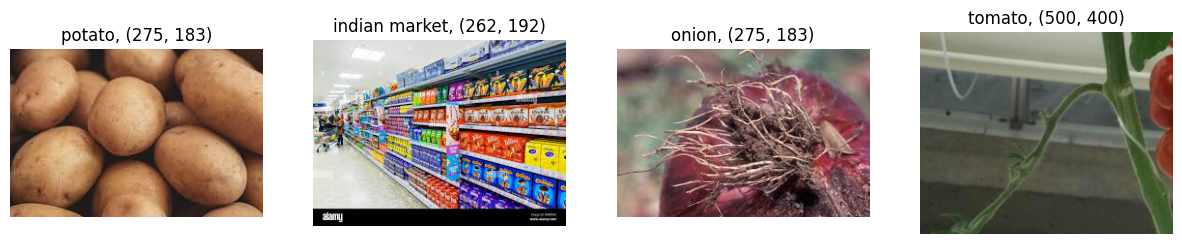

In [ ]:
## Viz Random Sample from each class

plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(3, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

In [ ]:
class_dirs = os.listdir("ninjacart_data/train") # list all directories inside "train" folder
sizes = {}
# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'ninjacart_data/train/{cls}/*')
    sizes[cls] = {}
    for path in file_paths:
        image = tf.keras.utils.load_img(path)
        if sizes[cls].get(image.size):
            sizes[cls][image.size] += 1
        else:
            sizes[cls][image.size] = 1

In [ ]:
df_size = pd.DataFrame(sizes)
df_size.fillna(0, inplace=True)
df_size['total'] = df_size.sum(axis=1)

<Axes: >

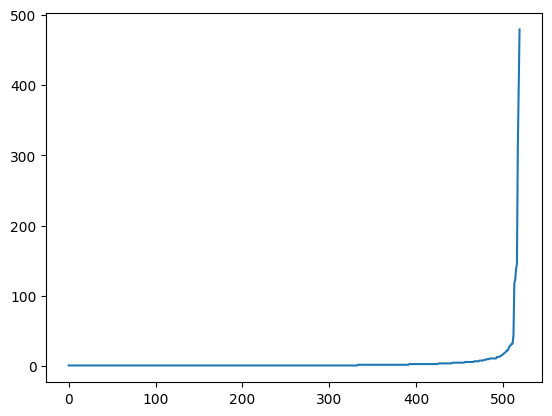

In [ ]:
sns.lineplot(df_size.total.sort_values().values)

<Axes: >

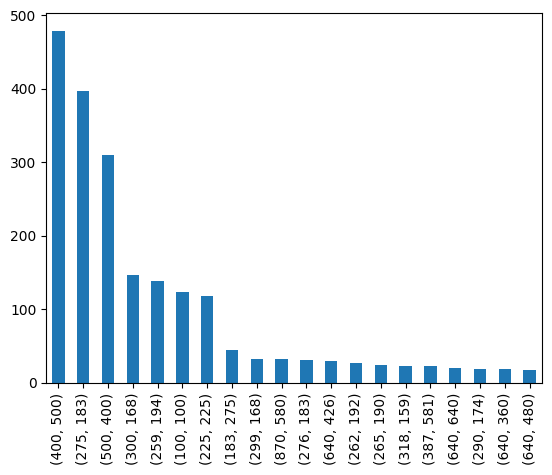

In [ ]:
df_size.total.sort_values(ascending=False).head(20).plot(kind='bar')

In [ ]:
x = df_size.reset_index().iloc[:, 0]
y = df_size.reset_index().iloc[:, 1]
weights = df_size.total

In [ ]:
temp = df_size.loc[:,['total']].sort_values(by='total', ascending=False)
temp = temp[(temp.total < temp.total.quantile(0.99)) & (temp.total > temp.total.quantile(0.01))]

In [ ]:
temp.values.T.reshape(-1), temp.index.get_level_values(0)

(array([118.,  44.,  32.,  32.,  30.,  29.,  27.,  24.,  22.,  22.,  20.,
         19.,  18.,  17.,  16.,  15.,  14.,  14.,  13.,  13.,  13.,  11.,
         11.,  11.,  11.,  11.,  11.,  11.,  11.,  10.,  10.,  10.,  10.,
          9.,   9.,   9.,   8.,   8.,   8.,   8.,   8.,   7.,   7.,   7.,
          7.,   7.,   7.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,
          6.,   6.,   6.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
          5.,   5.,   5.,   5.,   5.,   5.,   4.,   4.,   4.,   4.,   4.,
          4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,
          3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
          3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
          3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
          3.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2., 

In [ ]:
np.average(temp.index.get_level_values(0), weights=temp.values.T.reshape(-1)), np.average(temp.index.get_level_values(1), weights=temp.values.T.reshape(-1))

(371.09181141439205, 296.98345740281223)

In [ ]:
np.average(x, weights=weights), np.average(y, weights=weights)

(381.74673046251996, 325.75374800637957)

Count of training samples per class:
            class  count
0         potato    898
1  indian market    599
2          onion    849
3         tomato    789



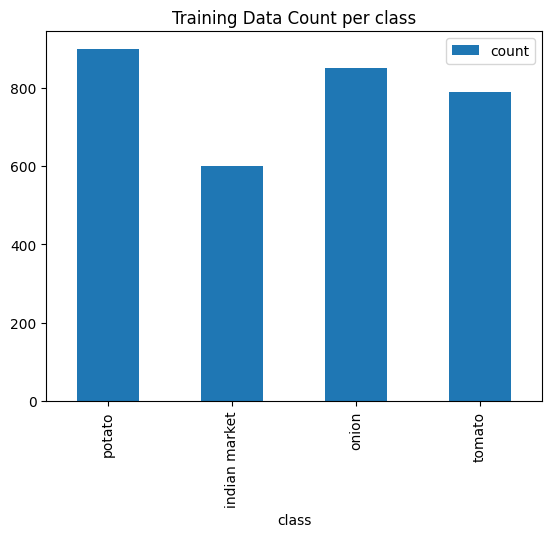

In [ ]:
## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})
print("Count of training samples per class:\n", df_count_train)
print()

df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class")
plt.show()

## New code

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "ninjacart_data/train",
    shuffle = True,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=42
)

print('\nLoading Validation Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "ninjacart_data/train",
    shuffle = True,
    image_size=(img_height, img_width),
    subset='validation',
    validation_split=0.2,
    batch_size=batch_size,
    seed=42
)

print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "ninjacart_data/test", shuffle = False,
    batch_size=32,
)


Loading Train Data...
Found 3135 files belonging to 4 classes.
Using 2508 files for training.

Loading Validation Data...
Found 3135 files belonging to 4 classes.
Using 627 files for validation.

Loading Test Data...
Found 351 files belonging to 4 classes.


In [ ]:
class_names = train_data.class_names
print(class_names)

['indian market', 'onion', 'potato', 'tomato']


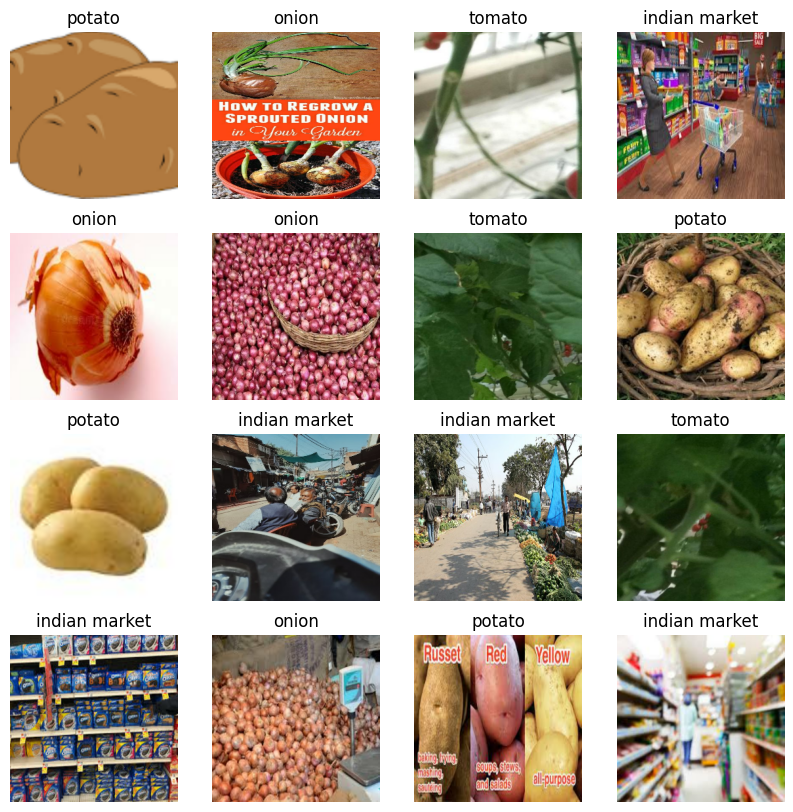

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

model = keras.models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, min_delta=0.001),
             keras.callbacks.ReduceLROnPlateau()
]

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )

In [ ]:
epochs=30
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/30
79/79 [==============================] - 24s 80ms/step - loss: 1.1066 - accuracy: 0.5040 - val_loss: 0.8607 - val_accuracy: 0.6348 - lr: 0.0010
Epoch 2/30
79/79 [==============================] - 3s 36ms/step - loss: 0.7420 - accuracy: 0.7125 - val_loss: 0.7063 - val_accuracy: 0.7065 - lr: 0.0010
Epoch 3/30
79/79 [==============================] - 3s 36ms/step - loss: 0.6513 - accuracy: 0.7524 - val_loss: 0.6630 - val_accuracy: 0.7337 - lr: 0.0010
Epoch 4/30
79/79 [==============================] - 3s 37ms/step - loss: 0.6222 - accuracy: 0.7632 - val_loss: 0.6420 - val_accuracy: 0.7289 - lr: 0.0010
Epoch 5/30
79/79 [==============================] - 3s 37ms/step - loss: 0.6002 - accuracy: 0.7719 - val_loss: 0.6613 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 6/30
79/79 [==============================] - 3s 37ms/step - loss: 0.5509 - accuracy: 0.7919 - val_loss: 0.6039 - val_accuracy: 0.7544 - lr: 0.0010
Epoch 7/30
79/79 [==============================] - 3s 38ms/step - loss: 0.

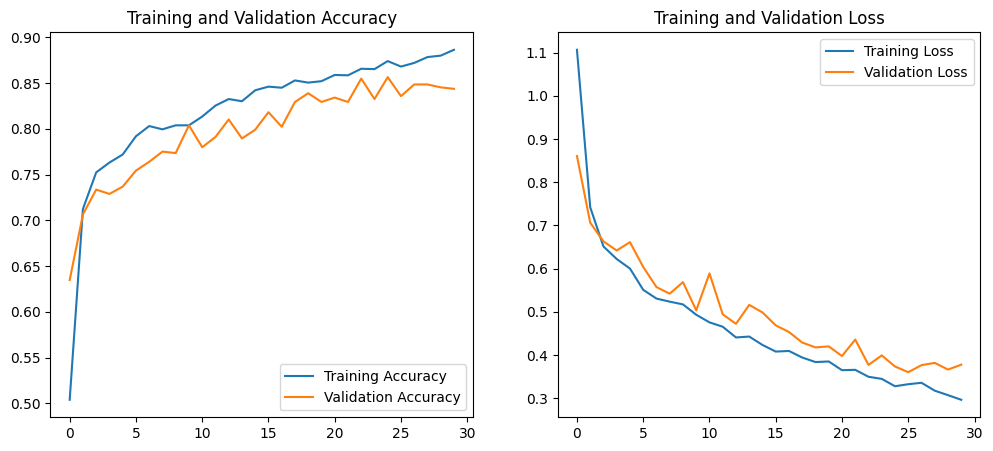

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

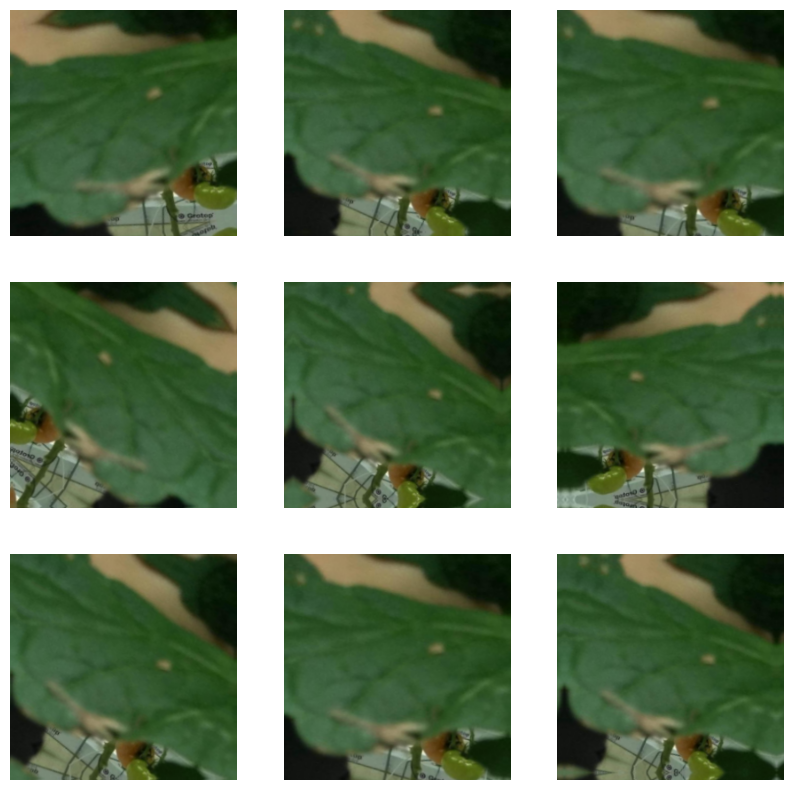

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = keras.models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=30
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/30
79/79 [==============================] - 8s 62ms/step - loss: 0.8686 - accuracy: 0.6463 - val_loss: 0.6145 - val_accuracy: 0.7608 - lr: 0.0010
Epoch 2/30
79/79 [==============================] - 5s 62ms/step - loss: 0.4745 - accuracy: 0.8166 - val_loss: 0.4570 - val_accuracy: 0.8230 - lr: 0.0010
Epoch 3/30
79/79 [==============================] - 5s 60ms/step - loss: 0.4287 - accuracy: 0.8381 - val_loss: 0.4845 - val_accuracy: 0.8086 - lr: 0.0010
Epoch 4/30
79/79 [==============================] - 5s 61ms/step - loss: 0.3858 - accuracy: 0.8521 - val_loss: 0.4379 - val_accuracy: 0.8214 - lr: 0.0010
Epoch 5/30
79/79 [==============================] - 5s 61ms/step - loss: 0.3866 - accuracy: 0.8545 - val_loss: 0.3894 - val_accuracy: 0.8581 - lr: 0.0010
Epoch 6/30
79/79 [==============================] - 5s 59ms/step - loss: 0.3566 - accuracy: 0.8680 - val_loss: 0.3733 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 7/30
79/79 [==============================] - 5s 61ms/step - loss: 0.3

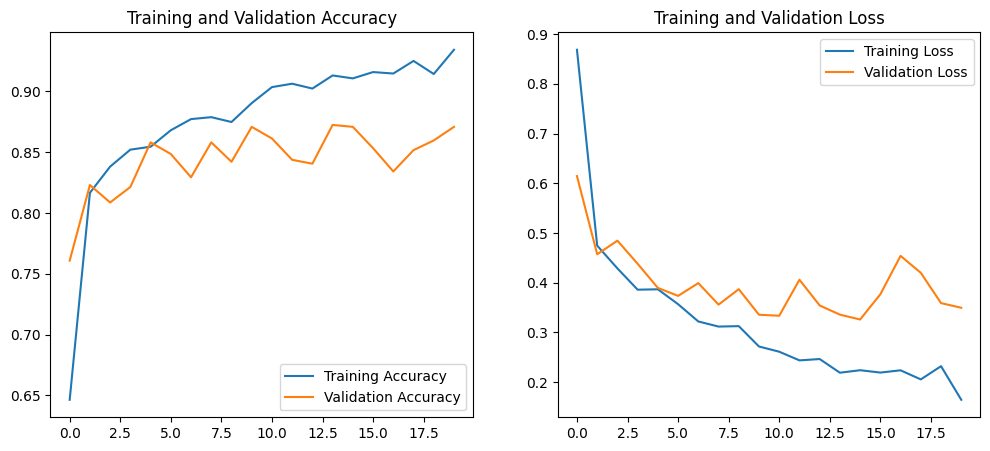

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(test_data)

11/11 [==============================] - 2s 231ms/step - loss: 0.4174 - accuracy: 0.8746


[0.41742902994155884, 0.874643862247467]

## Transfer learning and Finetunning

### MobilenetV2

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
def preprocess(images, labels):
    images = tf.image.resize(images, (224,224))
    return tf.keras.applications.mobilenet_v2.preprocess_input(images), labels

train_data = train_data.map(preprocess)
val_data = val_data.map(preprocess)
test_data = test_data.map(preprocess)

In [ ]:
train_data, val_data

(<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [ ]:
IMG_SIZE = (224, 224)
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 2s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_data))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(num_classes)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 4)


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(224,
                                  224,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                             

In [ ]:
len(model.trainable_variables)

2

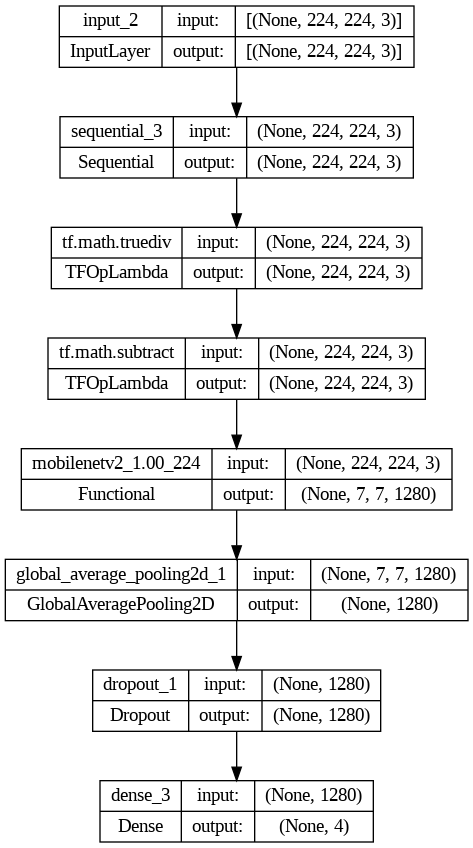

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_data)

20/20 [==============================] - 4s 82ms/step - loss: 1.4541 - accuracy: 0.2057


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.45
initial accuracy: 0.21


In [ ]:
history = model.fit(train_data,
                    epochs=initial_epochs,
                    validation_data=val_data)

Epoch 1/10
79/79 [==============================] - 8s 65ms/step - loss: 1.4593 - accuracy: 0.2652 - val_loss: 1.3704 - val_accuracy: 0.3062
Epoch 2/10
79/79 [==============================] - 5s 65ms/step - loss: 1.4503 - accuracy: 0.2687 - val_loss: 1.3565 - val_accuracy: 0.3222
Epoch 3/10
79/79 [==============================] - 5s 67ms/step - loss: 1.4343 - accuracy: 0.2895 - val_loss: 1.3452 - val_accuracy: 0.2935
Epoch 4/10
79/79 [==============================] - 5s 62ms/step - loss: 1.4101 - accuracy: 0.2927 - val_loss: 1.3356 - val_accuracy: 0.3413
Epoch 5/10
79/79 [==============================] - 6s 70ms/step - loss: 1.3989 - accuracy: 0.2994 - val_loss: 1.3276 - val_accuracy: 0.3190
Epoch 6/10
79/79 [==============================] - 5s 64ms/step - loss: 1.3964 - accuracy: 0.2947 - val_loss: 1.3146 - val_accuracy: 0.3907
Epoch 7/10
79/79 [==============================] - 5s 63ms/step - loss: 1.3698 - accuracy: 0.3214 - val_loss: 1.3021 - val_accuracy: 0.3573
Epoch 8/10
79

> Note: If you are wondering why the validation metrics are clearly better than the training metrics, the main factor is because layers like tf.keras.layers.BatchNormalization and tf.keras.layers.Dropout affect accuracy during training. They are turned off when calculating validation loss.


To a lesser extent, it is also because training metrics report the average for an epoch, while validation metrics are evaluated after the epoch, so validation metrics see a model that has trained slightly longer.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()